Prachee Prasad, 381060

**DL LAB 7**

Object detection using YOLO and Pretrained Model

Problem: Real-time Object Detection

In [ ]:
# Install Ultralytics (YOLOv8)
!pip -q install ultralytics

import torch, os, io, sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO
from google.colab import files

# Pretty print device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 116.8 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 fil

In [ ]:
# Load pretrained YOLOv8 model (COCO classes)
model = YOLO('yolov8n.pt')  # or 'yolov8s.pt' / 'yolov8m.pt'
model.to(device)
model.fuse()  # small speed boost
print("Model loaded with classes:", model.names)

YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
Model loaded with classes: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 6

Saving rujprachphoto.jpg to rujprachphoto.jpg


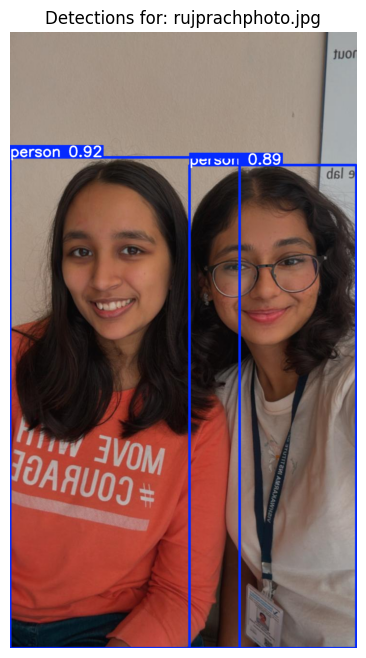

Done! Annotated images saved in: yolo_outputs


In [ ]:
# Upload images
uploaded = files.upload()  # select one or more images

# Inference settings
CONF_THRES = 0.25
IOU_THRES  = 0.45
IMGSZ      = 640

# Create output folder
out_dir = "yolo_outputs"
os.makedirs(out_dir, exist_ok=True)

all_results = []

for fname, filedata in uploaded.items():
    # Save uploaded bytes to a temp file
    with open(fname, 'wb') as f:
        f.write(filedata)

    # Run inference
    results = model.predict(
        source=fname,
        imgsz=IMGSZ,
        conf=CONF_THRES,
        iou=IOU_THRES,
        device=0 if device == 'cuda' else None,
        verbose=False
    )

    # There can be multiple images in results; here it's 1 per file
    res = results[0]

    # Plot annotated image
    annotated = res.plot()              # returns a BGR numpy array
    annotated_rgb = annotated[..., ::-1]  # BGR -> RGB

    # Show inline
    plt.figure(figsize=(8,8))
    plt.imshow(annotated_rgb)
    plt.axis('off')
    plt.title(f"Detections for: {fname}")
    plt.show()

    # Save annotated image
    save_path = os.path.join(out_dir, f"annotated_{os.path.basename(fname)}")
    Image.fromarray(annotated_rgb).save(save_path)

    # Collect structured detections (bbox xyxy, conf, class name)
    if res.boxes is not None and len(res.boxes) > 0:
        boxes = res.boxes.xyxy.cpu().numpy()
        confs = res.boxes.conf.cpu().numpy()
        clsid = res.boxes.cls.cpu().numpy().astype(int)
        names = [model.names[i] for i in clsid]
        for (x1, y1, x2, y2), c, n in zip(boxes, confs, names):
            all_results.append({
                "file": fname,
                "class": n,
                "conf": float(c),
                "x1": float(x1),
                "y1": float(y1),
                "x2": float(x2),
                "y2": float(y2),
                "annotated_path": save_path
            })
    else:
        all_results.append({
            "file": fname,
            "class": "(no detections)",
            "conf": None,
            "x1": None,"y1": None,"x2": None,"y2": None,
            "annotated_path": save_path
        })

print("Done! Annotated images saved in:", out_dir)